In [0]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

0. prepare data
1. model
2. loss and optimizer
3. training loop

In [0]:
# 0
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=0)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(X.shape)
print(y.shape)
y = y.view(y.shape[0],1)
print(y.shape)

n_samples, n_features = X.shape

torch.Size([100, 1])
torch.Size([100])
torch.Size([100, 1])


In [0]:
# 1
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [0]:
# 2
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epoch : 0, loss = 489.2209
epoch : 10, loss = 478.3906
epoch : 20, loss = 471.1742
epoch : 30, loss = 466.3629
epoch : 40, loss = 463.1531
epoch : 50, loss = 461.0105
epoch : 60, loss = 459.5795
epoch : 70, loss = 458.6231
epoch : 80, loss = 457.9836
epoch : 90, loss = 457.5556


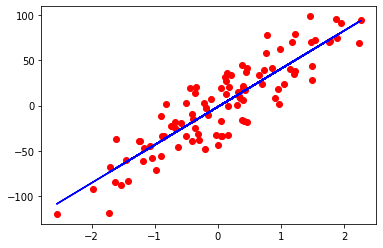

In [0]:
# 3
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predict = model(X)
    loss = criterion(y_predict, y)
    # backward pass
    loss.backward()
    # update
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f'epoch : {epoch}, loss = {loss.item():.4f}')

final_predict = model(X).detach() # not train so no need gradient backprop
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, final_predict, 'b')
plt.show()